# Work with DAQ data through SpecTcl
This notebook demonstrates:

* How to reach the spectra data through SpecTcl server, and do the data analysis with Python.
* Data from multiple SpecTcl servers could be integrated into the same analysis environment.
* Work with other Python packages.

Tong Zhang

2021-06-04 (rev. 2021-06-08)

## Preparation of SpecTcl server(s)

Please refer to the section regarding SpecTcl shown in the file develop-vmphy0-v8.pdf, in which a server at localhost:8000 should be established for the clients.

In this notebook, two servers at port 8000 and 8001 has been started up, respectively.

### What is **PySpecTcl**
The project **pyspectcl** was created to handle all the data communication between Python client (local) and SpecTcl server (remote).

* Request data from remote
* Normalize data into table
* Common API for data pre-processing

### How to install
In virtualbox appliance: develop-vmphy0-v7 and v8:
```
sudo apt update
sudo apt install python3-pyspectcl
```


In [1]:
import spectcl
spectcl.info()

PySpecTcl (v0.0.4): Python interface to SpecTcl REST server.
Developed by: Tong Zhang <zhangt@frib.msu.edu>


## Fetch data from SpecTcl server

In [2]:
from spectcl.client import DataClient

In [3]:
client = DataClient()

In [4]:
# by default the client is hooked to localhost at port 8000
client

[Data Client] SpecTcl REST Service on: http://127.0.0.1:8000/spectcl

In [5]:
# But could be re-configured
client.base_url = "http://127.0.0.1"
client.port = 8000

In [6]:
client

[Data Client] SpecTcl REST Service on: http://127.0.0.1:8000/spectcl

### Pull spectrum definition

In [7]:
spec_conf = client.list()
spec_conf

,Type,Parameters,Axes,ChanType
Name,,,,
ctl::fp.ge.e,1,[a1900.fp.ge.e],"[{'low': 0.0, 'high': 8192.0, 'bins': 8192}]",word
ctl::fp.ge.e_cal,1,[a1900.fp.ge.e_cal],"[{'low': 0.0, 'high': 4000.0, 'bins': 4000}]",word
ctl::fp.ge.t,1,[a1900.fp.ge.t],"[{'low': 0.0, 'high': 32768.0, 'bins': 32768}]",word
ctl::fp.pin.dE,1,[a1900.fp.pin.dE],"[{'low': 0.0, 'high': 500.0, 'bins': 1000}]",word
ctl::fp.pin.e,1,[a1900.fp.pin.e],"[{'low': 0.0, 'high': 8192.0, 'bins': 8192}]",word
...,...,...,...,...
trk::i2.b,1,[a1900.i2.b],"[{'low': -50.0, 'high': 50.0, 'bins': 200}]",word
trk::i2.b_vs_y,2,"[a1900.i2.y, a1900.i2.b]","[{'low': -50.0, 'high': 50.0, 'bins': 200}, {'...",word
trk::i2.x,1,[a1900.i2.x],"[{'low': -200.0, 'high': 200.0, 'bins': 200}]",word


In [8]:
# client.list().filter(like='pid', axis=0)

In [9]:
# list with filter pattern
client.list(filter='*pid*tof*')

,Type,Parameters,Axes,ChanType
Name,,,,
pid::fp.pin.dE_vs_tof.i2n,2,"[a1900.tof.i2n, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.i2s,2,"[a1900.tof.i2s, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.rf1,2,"[a1900.tof.rf1, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.rf1!FPslits,2,"[a1900.tof.rf1, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.rf1cor,2,"[a1900.tof.rf1cor, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.rf2,2,"[a1900.tof.rf2, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.rf2!FPslits,2,"[a1900.tof.rf2, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.dE_vs_tof.rf2cor,2,"[a1900.tof.rf2cor, a1900.fp.pin.dE]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word
pid::fp.pin.e_vs_tof.rf1,2,"[a1900.tof.rf1, a1900.fp.pin.e]","[{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...",word


In [10]:
# inspect one spectrum definition
spec_name = 'pid::fp.pin.dE_vs_tof.rf2'
spec_conf.loc[spec_name]

Type                                                          2
Parameters                     [a1900.tof.rf2, a1900.fp.pin.dE]
Axes          [{'low': 0.0, 'high': 100.0, 'bins': 1000}, {'...
ChanType                                                   word
Name: pid::fp.pin.dE_vs_tof.rf2, dtype: object

### Pull the data w.r.t. spectrum name

In [11]:
data = client.contents(spec_name)
data

,a1900.tof.rf2,a1900.fp.pin.dE,count
0,0,13,593
1,27,13,1
2,29,13,1
3,30,13,3
4,32,13,3
...,...,...,...
11937,304,329,1
11938,92,330,1
11939,97,332,1
11940,226,335,1


In [12]:
data.describe()

,a1900.tof.rf2,a1900.fp.pin.dE,count
count,11942.000000,11942.000000,11942.000000
mean,196.181963,173.768715,2.741919
std,110.984740,81.762211,9.224283
min,0.000000,13.000000,1.000000
25%,98.000000,112.000000,1.000000
50%,206.000000,177.000000,1.000000
75%,303.000000,243.000000,2.000000
max,408.000000,337.000000,593.000000


### Visualize spectrum

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 8)
matplotlib.rcParams['figure.dpi'] = 150

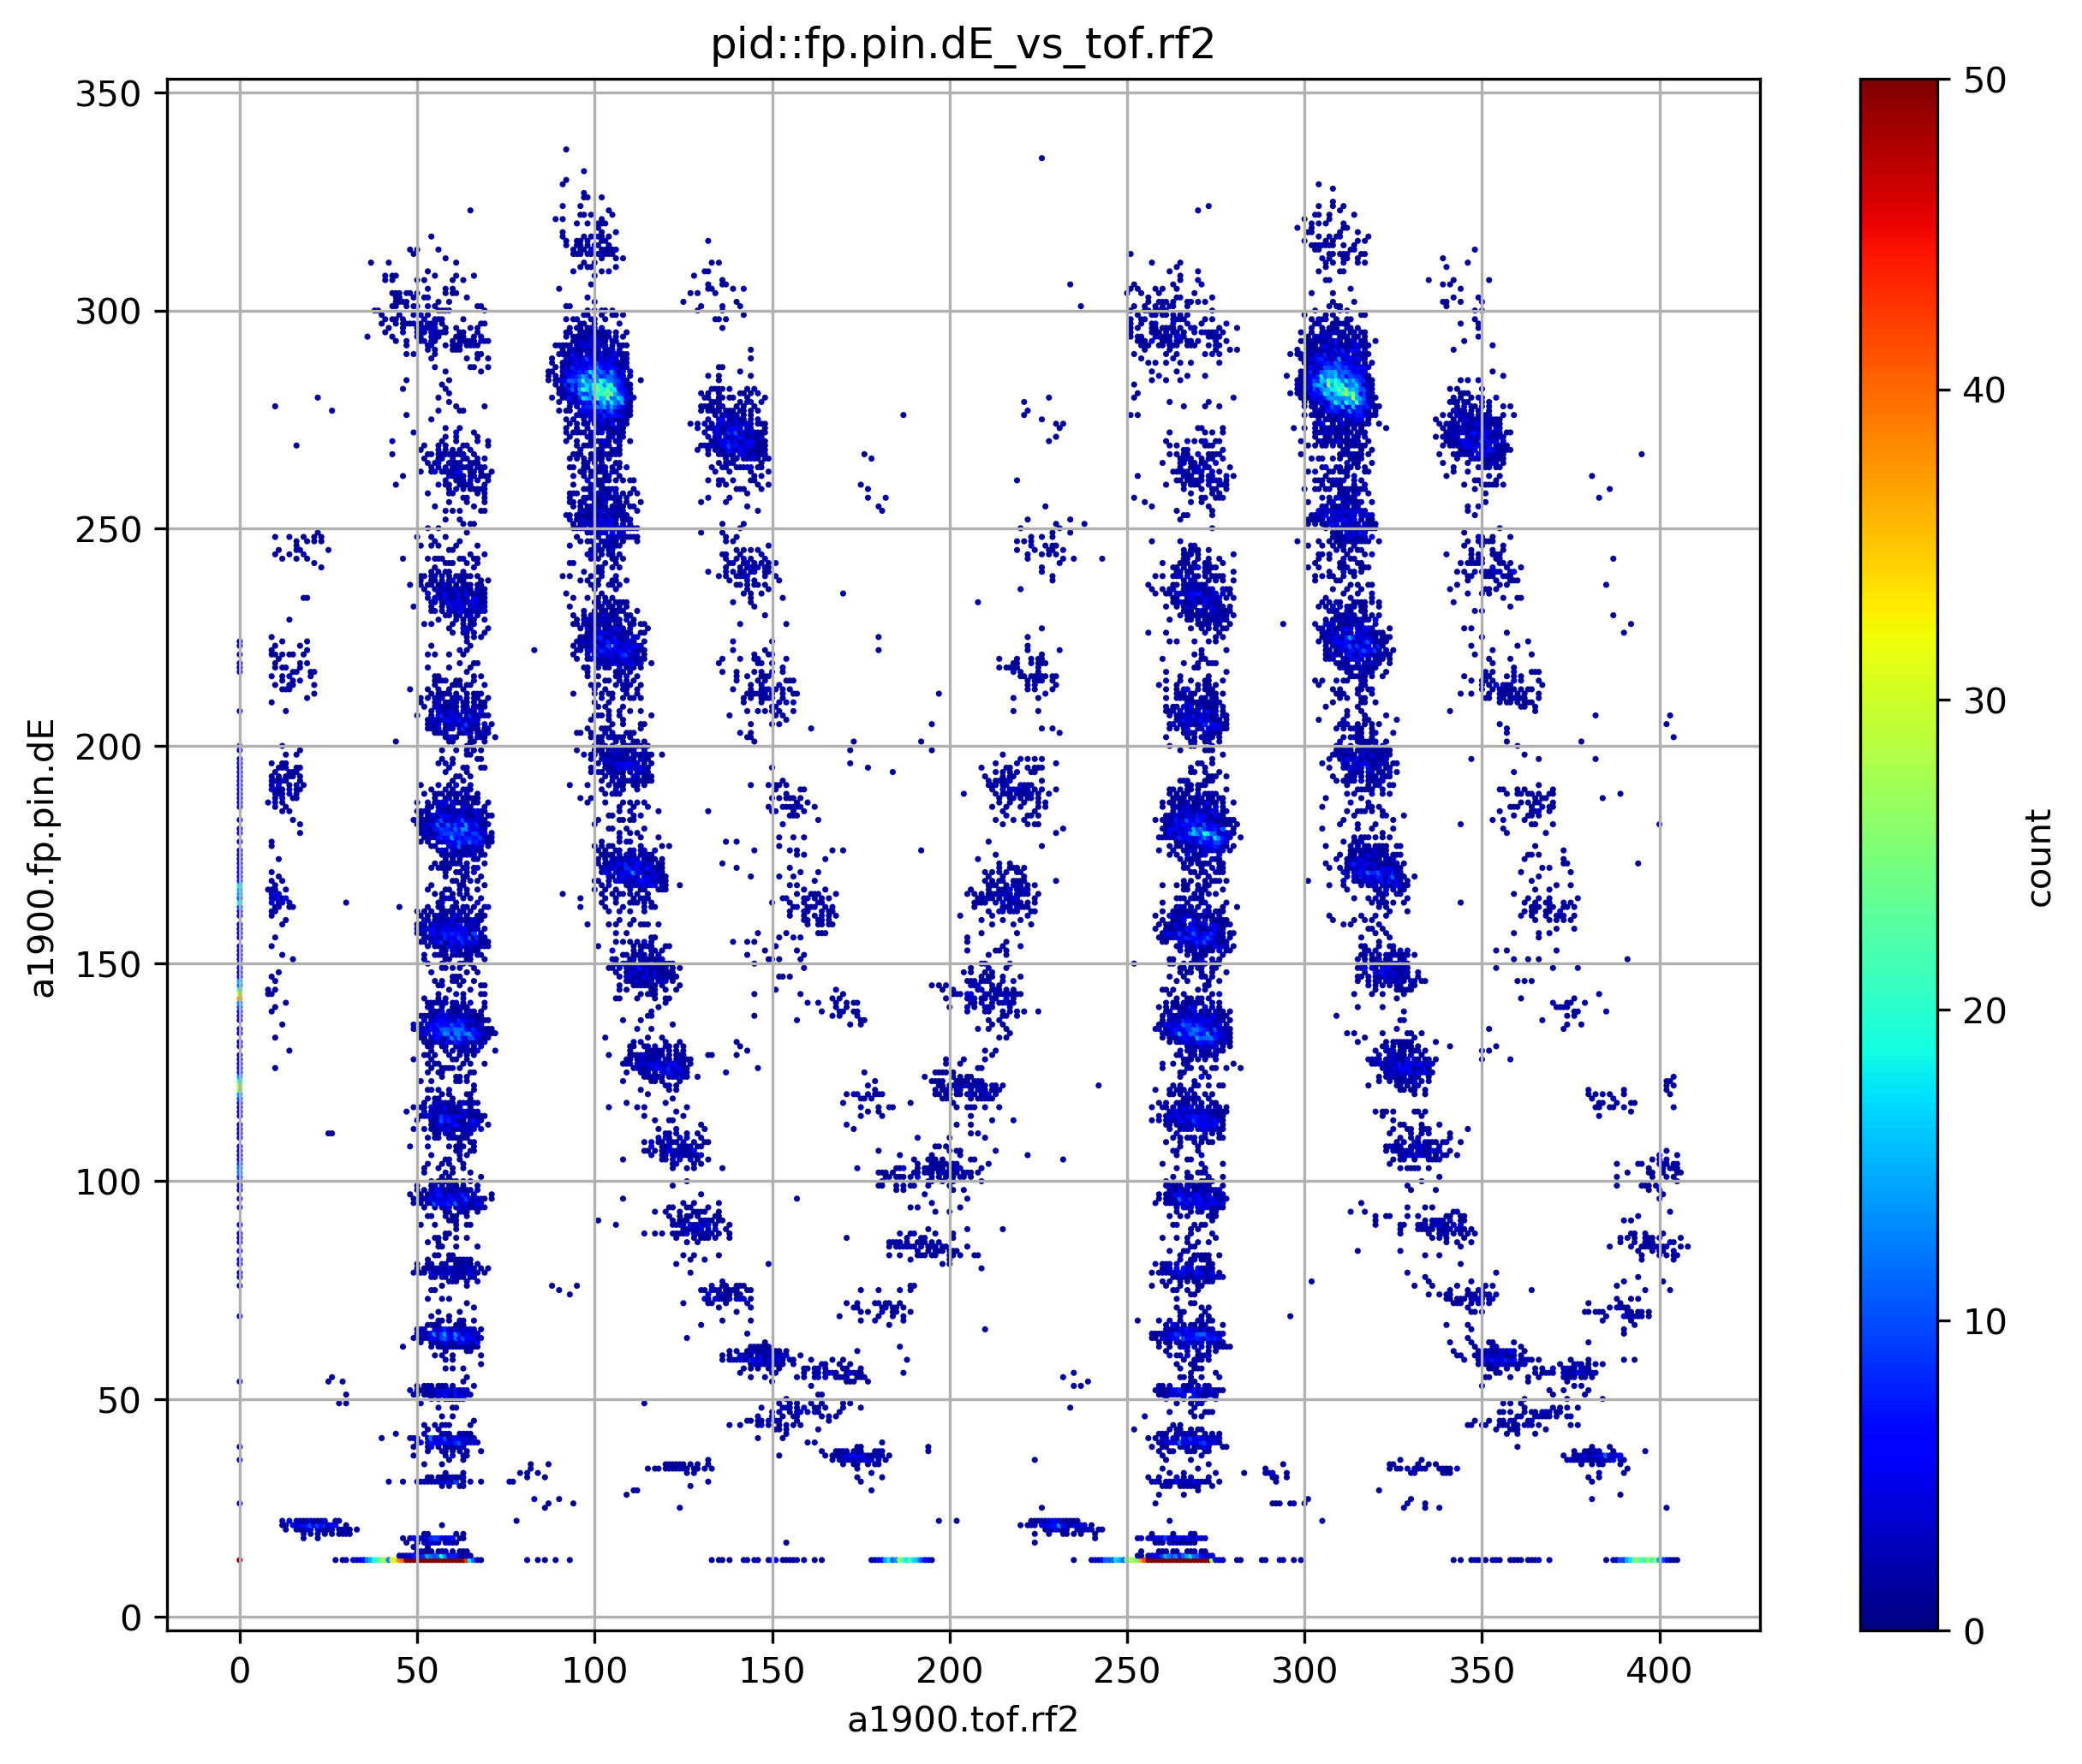

In [14]:
fig, ax = plt.subplots()
data.plot(x='a1900.tof.rf2', y='a1900.fp.pin.dE', c='count',
          vmin=0, vmax=50, s=0.5, cmap='jet', kind='scatter', ax=ax, grid=True,
          title=spec_name);

### Create another client hooking to another SpecTcl server

In [15]:
client1 = DataClient(port=8001)
client1

[Data Client] SpecTcl REST Service on: http://127.0.0.1:8001/spectcl

In [16]:
data1 = client1.contents(spec_name)
data1.describe()

,a1900.tof.rf2,a1900.fp.pin.dE,count
count,8520.000000,8520.000000,8520.000000
mean,229.381690,166.632042,26.505751
std,112.886773,44.109732,105.972865
min,0.000000,13.000000,1.000000
25%,135.000000,143.000000,1.000000
50%,191.000000,168.000000,2.000000
75%,344.000000,189.000000,7.000000
max,405.000000,389.000000,1176.000000


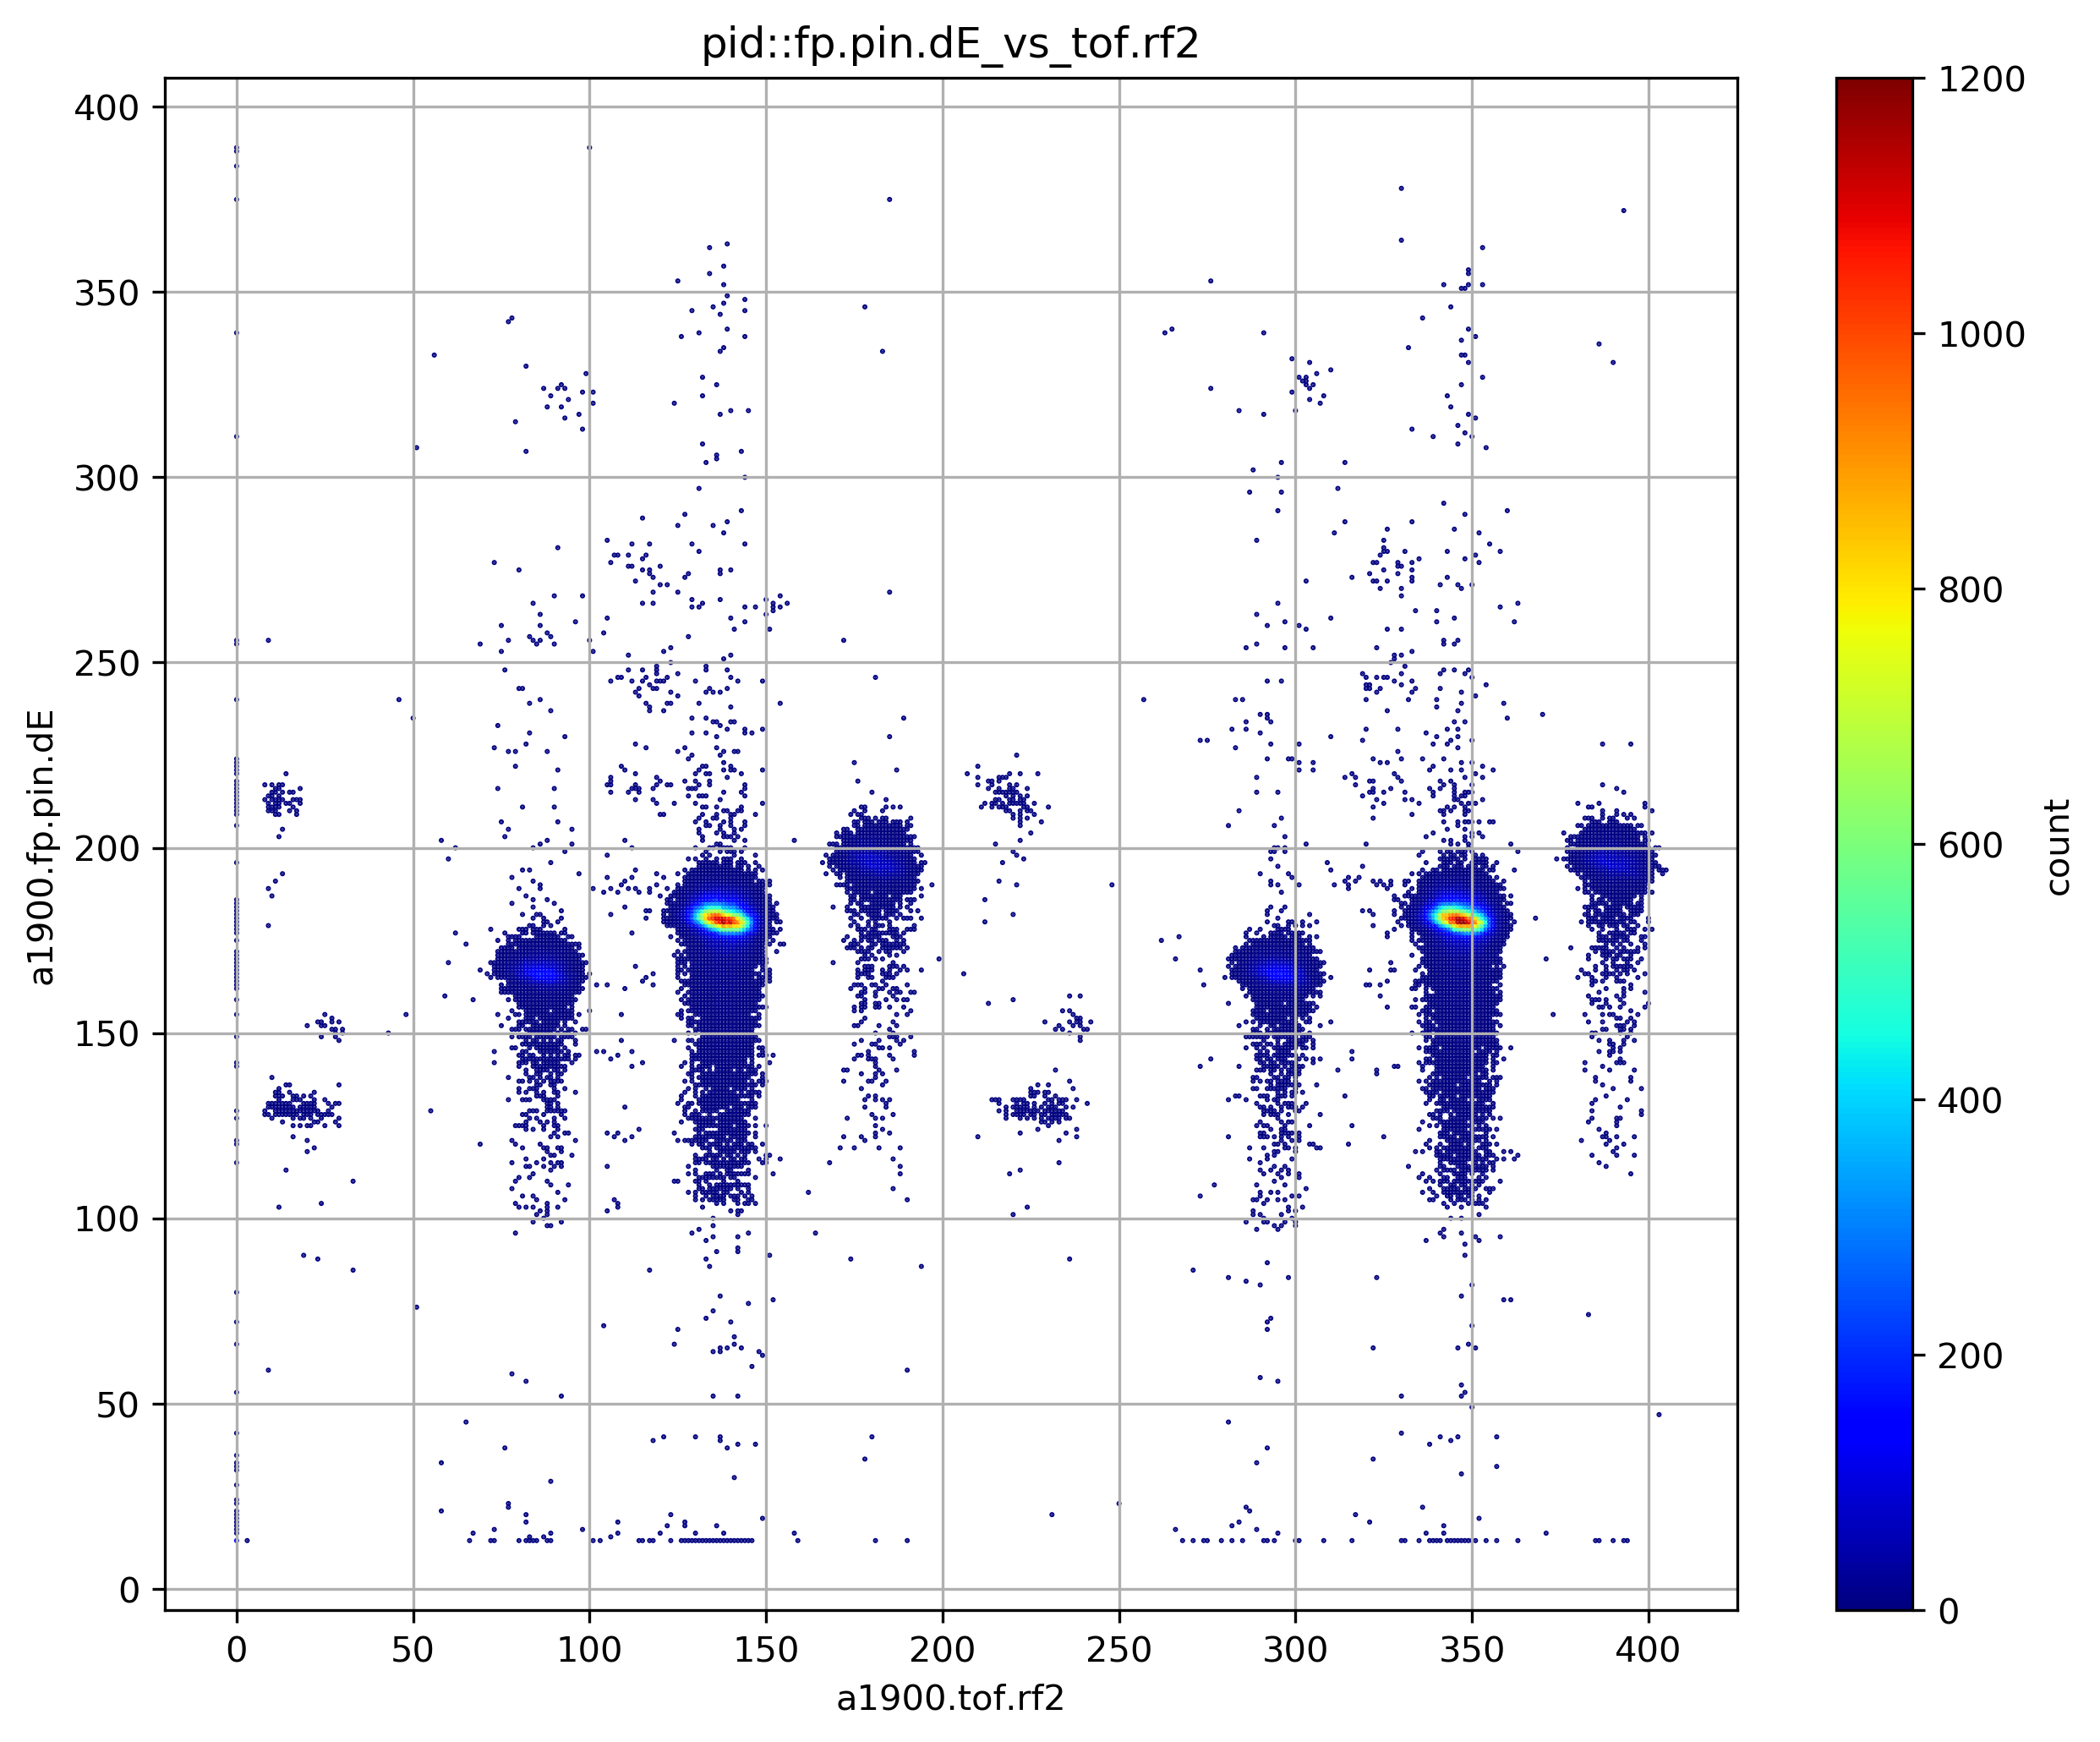

In [17]:
fig1, ax1 = plt.subplots()
data1.plot(x='a1900.tof.rf2', y='a1900.fp.pin.dE', c='count',
           vmin=0, vmax=1200, s=0.2, cmap='jet', kind='scatter', ax=ax1, grid=True,
           title=spec_name);

### Advanced processing
e.g. use existing clustering algorithms to auto-cluster isotops.

In [96]:
from sklearn.mixture import BayesianGaussianMixture

In [97]:
from sklearn.mixture import BayesianGaussianMixture as BGMM
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None, cmap='viridis', ms=10, ellipse_on=False, equal_axis=False):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=ms, cmap=cmap, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=ms, zorder=2)
    if equal_axis:
        ax.axis('equal')
    
    if ellipse_on:
        w_factor = 0.2 / gmm.weights_.max()
        for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
            draw_ellipse(pos, covar, alpha=w * w_factor)

def cluster_fn(x_data_range, y_data_range, df, n_components, random_state=0, ms=5, cmap='jet', bayesian_on=True, covariance_type='full', **kws):
    xmin, xmax = x_data_range
    ymin, ymax = y_data_range
    df1 = df[(df.x < xmax) & (df.x > xmin) & (df.y < ymax) & (df.y > ymin)]
    X = np.vstack([df1.x.to_numpy(), df1.y.to_numpy()]).T
    if bayesian_on:
        gmm = BGMM(n_components=n_components, covariance_type=covariance_type, random_state=random_state, **kws)
    else:
        gmm = GMM(n_components=n_components, covariance_type=covariance_type, random_state=random_state, **kws)
    plot_gmm(gmm, X, ms=ms, cmap=cmap, ellipse_on=True)
    #plt.xlim(0, 400)
    #plt.ylim(0, 350)

In [98]:
data['x'] = data['a1900.tof.rf2']
data['y'] = data['a1900.fp.pin.dE']
data2 = data.loc[np.repeat(data.index.values, 5 * data['count'])]

/usr/lib/python3/dist-packages/sklearn/mixture/_base.py:263: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


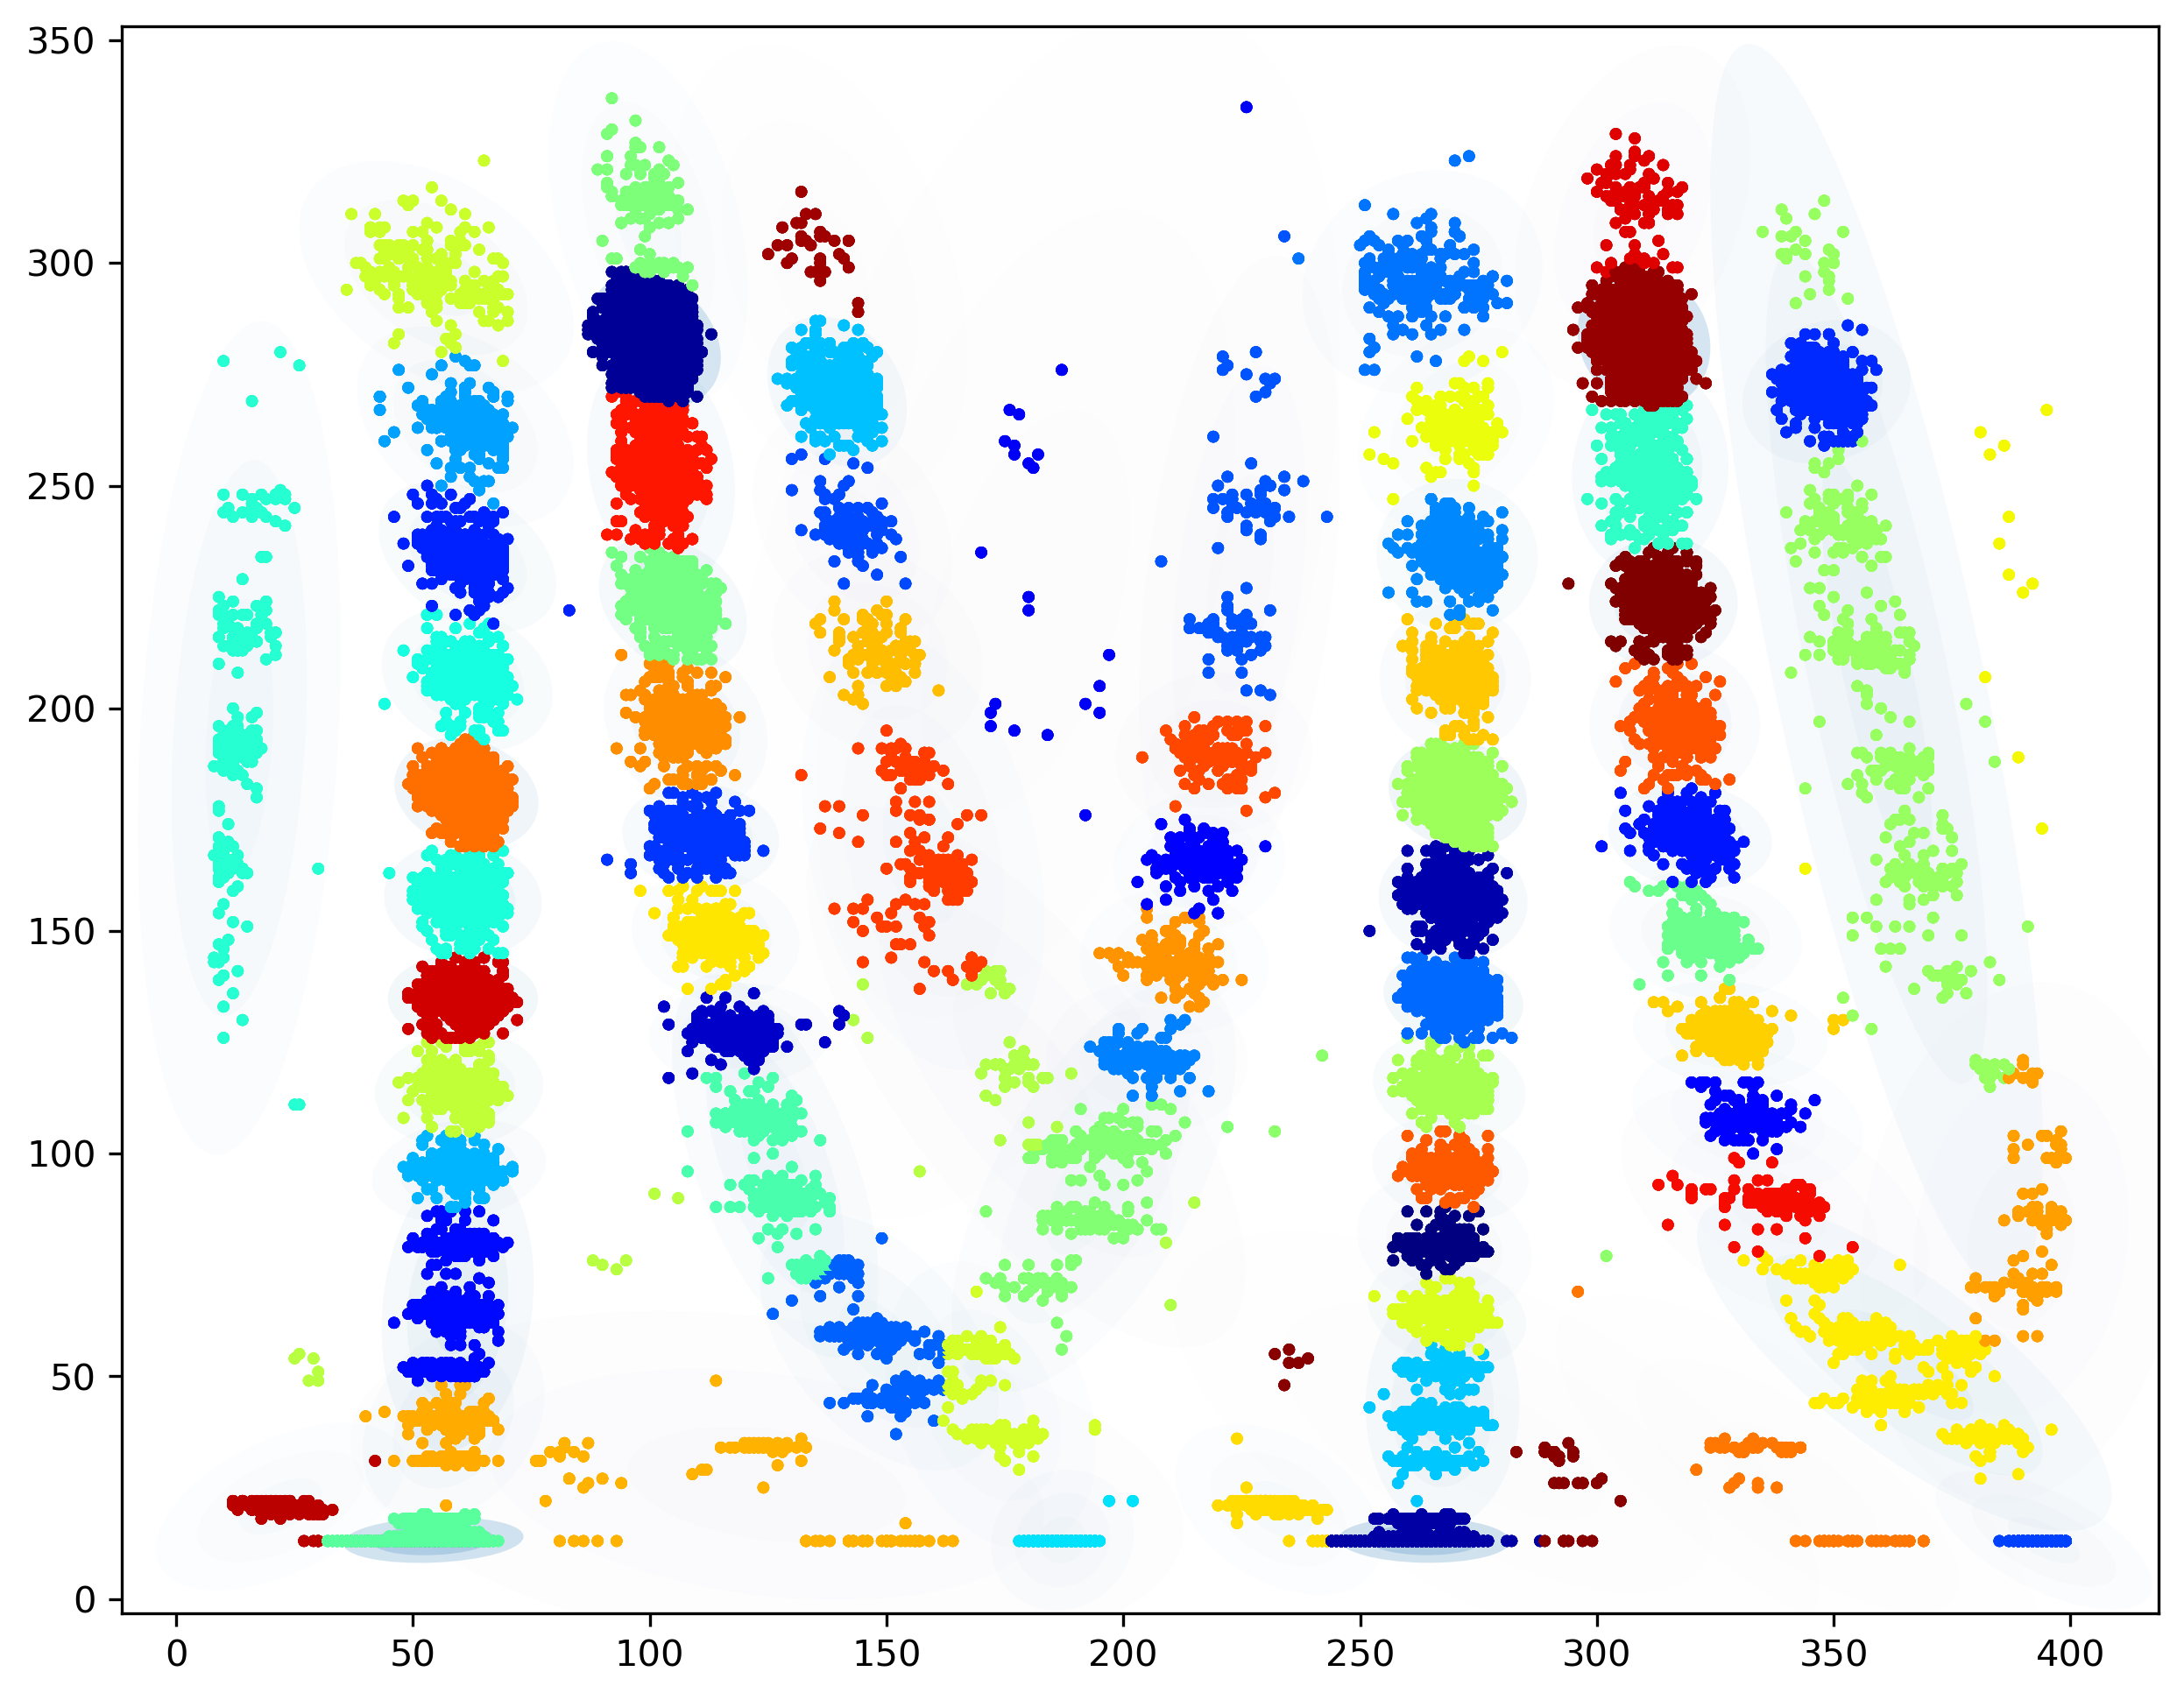

In [95]:
cluster_fn([0, 400], [0, 350], data2, 100, random_state=43, bayesian_on=True, covariance_type='full', ms=5)